# Persoalan 2
Lakukan data mining classification dengan metode NN dengan menggunakan data histori 200 pegawai terlampir, serta beberapa data uji untuk menentukan pegawai potensial tetap bekerja di kantor tersebut atau  tidak (keluar). Kemudian hitunglah performanya.

## Dependencies

In [703]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np


## Input Data

In [704]:
df = pd.read_excel('../dataset/Pegawai.xlsx', skiprows=4)
df.columns = df.iloc[0]
df = df[1:]
df = df.loc[:, ~df.columns.isnull()]

## Data Preprocessing

In [705]:
print("Dataset:")
print(df.sample(5))

Dataset:
0                 Name Sex Marital Status Children         Education  \
13   Terrence Brewster   M              M        2   Graduate Degree   
123      Hope Goldberg   F              M        1       High School   
65          John Lewis   M              M        1  Technical School   
61        Fred Anthony   M              M        2   Graduate Degree   
200      Anthony Brown   M              M        1           College   

0   Years Employed Work Hours Career Development Salary Bonuses  \
13               4         46                  0   2523      12   
123              9         35                  3   7606     228   
65              14         51                  2   6774     203   
61              11         34                  2   6435     193   
200              2         58                  1   3619      10   

0   Employee Intention  
13               Leave  
123               Stay  
65                Stay  
61                Stay  
200              Leave  


### Data Type

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                200 non-null    object
 1   Sex                 200 non-null    object
 2   Marital Status      200 non-null    object
 3   Children            200 non-null    object
 4   Education           200 non-null    object
 5   Years Employed      200 non-null    object
 6   Work Hours          200 non-null    object
 7   Career Development  200 non-null    object
 8   Salary              200 non-null    object
 9   Bonuses             200 non-null    object
 10  Employee Intention  200 non-null    object
dtypes: object(11)
memory usage: 17.3+ KB


In [707]:
df['Sex'] = df['Sex'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Children'] = df['Children'].astype(int)
df['Education'] = df['Education'].astype('category')
df['Years Employed'] = df['Years Employed'].astype(int)
df['Work Hours'] = df['Work Hours'].astype(int)
df['Career Development'] = df['Career Development'].astype(int)
df['Salary'] = df['Salary'].astype(int)
df['Bonuses'] = df['Bonuses'].astype(int)
df['Employee Intention'] = df['Employee Intention'].astype('category')


### Analisis Data Explorasi

In [708]:
print("Data Missing:")
df.isnull().sum()

Data Missing:


0
Name                  0
Sex                   0
Marital Status        0
Children              0
Education             0
Years Employed        0
Work Hours            0
Career Development    0
Salary                0
Bonuses               0
Employee Intention    0
dtype: int64

In [709]:
print("Data Duplicated:")
df.duplicated().sum()

Data Duplicated:


np.int64(0)

In [710]:
print("Statistic Descriptive:")
df.describe()

Statistic Descriptive:


,Children,Years Employed,Work Hours,Career Development,Salary,Bonuses
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.470000,5.030000,44.825000,2.230000,5213.100000,158.460000
std,0.625344,3.501486,8.457067,1.519422,2010.031048,86.203035
min,0.000000,0.000000,30.000000,0.000000,2004.000000,0.000000
25%,1.000000,2.000000,38.000000,1.000000,3360.750000,94.750000
50%,1.000000,4.000000,45.000000,2.000000,5215.500000,163.500000
75%,2.000000,7.000000,52.000000,3.000000,7037.500000,224.500000
max,3.000000,15.000000,60.000000,8.000000,8975.000000,354.000000


Histogram


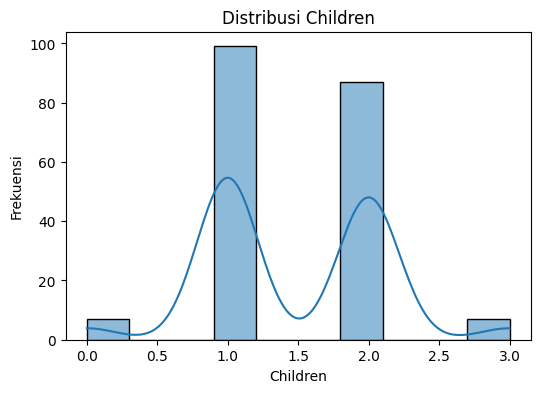

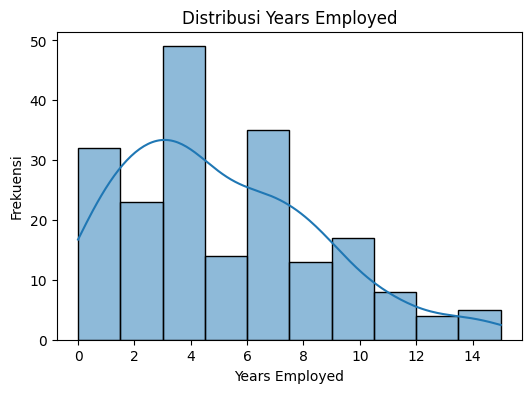

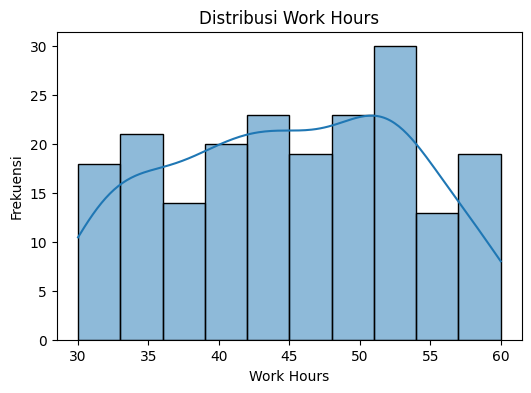

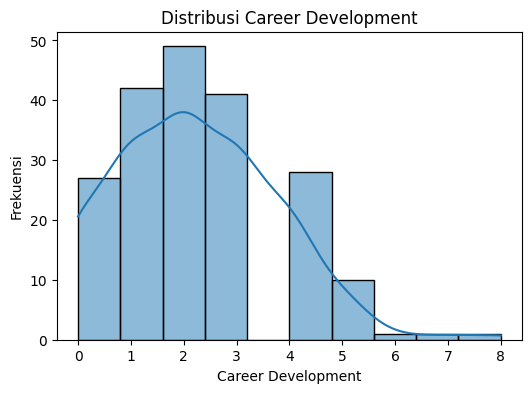

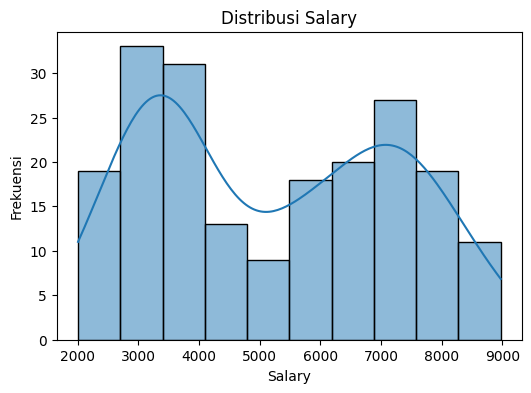

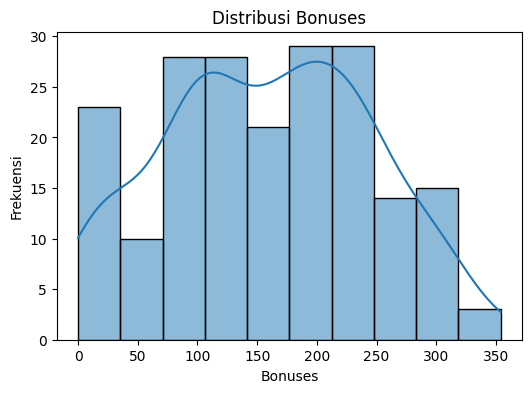

Countplot


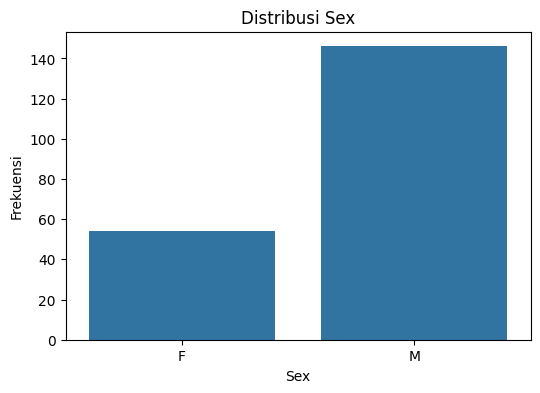

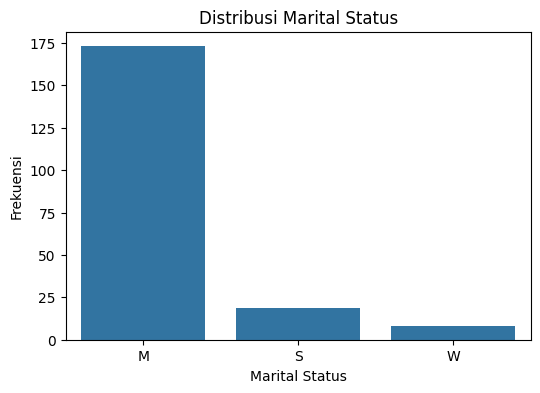

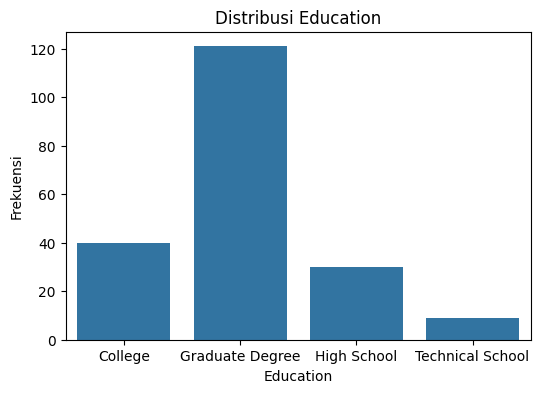

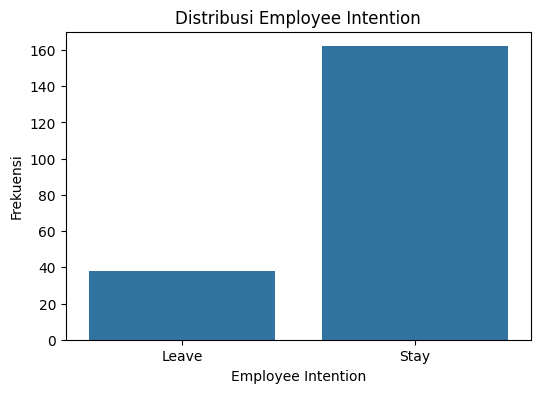

In [711]:

def visualize_distributions(df):
    """Visualisasi distribusi data numerik dan kategorikal."""
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['category']).columns

    # Visualisasi data numerik
    print("Histogram")
    for col in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=10)
        plt.title(f"Distribusi {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()

    # Visualisasi data kategorikal
    print("Countplot")
    for col in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribusi {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()

visualize_distributions(df)

### Label Encoder

In [712]:
def encode_columns(data_df, columns):
    """Melakukan encoding pada kolom tertentu dalam DataFrame."""
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        data_df[column] = encoder.fit_transform(data_df[column])
        encoders[column] = encoder
    return data_df, encoders

In [713]:
def create_reverse_mappings(encoders):
    """Membuat mapping untuk reverse encoding."""
    return {
        column: {index: label for index, label in enumerate(encoder.classes_)}
        for column, encoder in encoders.items()
    }

In [714]:
def decode_column(df, column, encoder):
    """Melakukan decoding pada kolom tertentu."""
    df[column] = encoder.inverse_transform(df[column])
    return df

# df = decode_column(df, 'Employee Intention', encoders['Employee Intention'])

In [715]:
columns_to_encode = [
    'Sex', 
    'Marital Status', 
    'Education', 
    'Career Development', 
    'Employee Intention'
    ]
df, encoders = encode_columns(df, columns_to_encode)

In [716]:
reverse_mapping = create_reverse_mappings(encoders)
print("\nMapping untuk reverse encoding:")
print(reverse_mapping)


Mapping untuk reverse encoding:
{'Sex': {0: 'F', 1: 'M'}, 'Marital Status': {0: 'M', 1: 'S', 2: 'W'}, 'Education': {0: 'College', 1: 'Graduate Degree', 2: 'High School', 3: 'Technical School'}, 'Career Development': {0: np.int64(0), 1: np.int64(1), 2: np.int64(2), 3: np.int64(3), 4: np.int64(4), 5: np.int64(5), 6: np.int64(6), 7: np.int64(7), 8: np.int64(8)}, 'Employee Intention': {0: 'Leave', 1: 'Stay'}}


### StandardScaler

In [717]:
def scale_columns(data_df, columns):
    """Melakukan scaling pada kolom tertentu dalam DataFrame."""
    scaler = StandardScaler()
    scaled_data = data_df.copy()
    for column in columns:
        scaled_data[column] = scaler.fit_transform(scaled_data[[column]])
    return scaled_data, scaler

In [718]:
df.columns

Index(['Name', 'Sex', 'Marital Status', 'Children', 'Education',
       'Years Employed', 'Work Hours', 'Career Development', 'Salary',
       'Bonuses', 'Employee Intention'],
      dtype='object', name=0)

In [719]:
columns_to_scaler = [
    'Children',
    'Years Employed',
    # 'Work Hours',
    'Career Development',
    'Salary'
]

df, scalers = scale_columns(df, columns_to_scaler)

### Min Max Scaler

In [720]:
def min_max_scale_columns(data_df, columns):
    """Melakukan scaling pada kolom tertentu dalam DataFrame."""
    scaler = StandardScaler()
    scaled_data = data_df.copy()
    for column in columns:
        scaled_data[column] = scaler.fit_transform(scaled_data[[column]])
    return scaled_data, scaler

In [721]:
columns_to_min_max_scaler = [
    # 'Children',
    # 'Years Employed',
    'Work Hours',
    # 'Career Development',
    # 'Salary'
]

df, min_max_scalers = min_max_scale_columns(df, columns_to_min_max_scaler)

### Analisis Korelasi


Matriks Korelasi Sebelum Handling:


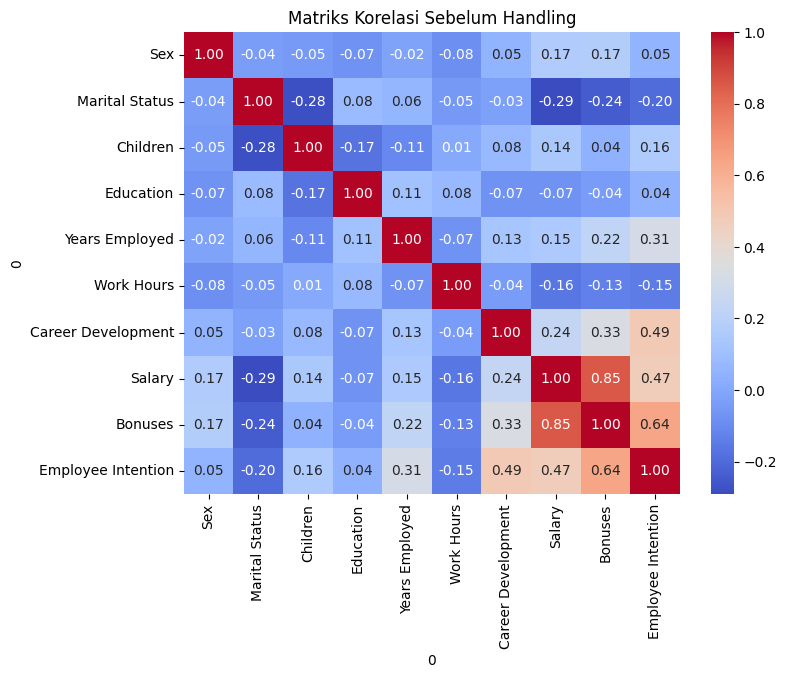


Matriks Korelasi Sesudah Handling dan Penghapusan Fitur:


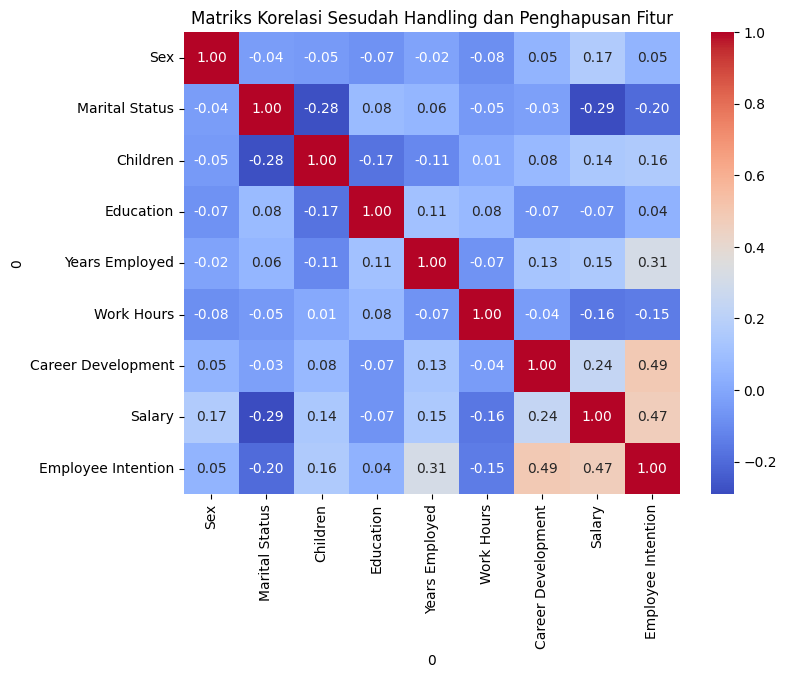

In [722]:
def correlation_analysis(df):
    """Menampilkan matriks korelasi untuk data numerik sebelum dan sesudah handling."""
    print("\nMatriks Korelasi Sebelum Handling:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matriks Korelasi Sebelum Handling")
    plt.show()
    handled_df = df.copy()
    correlation_matrix = handled_df.corr()
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
    handled_df = handled_df.drop(columns=to_drop, axis=1)

    print("\nMatriks Korelasi Sesudah Handling dan Penghapusan Fitur:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(handled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matriks Korelasi Sesudah Handling dan Penghapusan Fitur")
    plt.show()
    return handled_df
df = correlation_analysis(df.drop(columns='Name'))

## Modelling

In [723]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split



In [724]:
X = df.drop(columns=['Employee Intention'])
y = df['Employee Intention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [725]:
def build_neural_network(input_dim, learning_rate=0.001):
    """Membangun model neural network."""
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [726]:
def plot_training_history(history):
    """Menampilkan grafik akurasi dan loss selama pelatihan."""
    # Plot Akurasi
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Akurasi Training')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
    plt.title('Performa Akurasi Selama Pelatihan')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.show()
    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss Training')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Loss Validation')
    plt.title('Performa Loss Selama Pelatihan')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [727]:
model = build_neural_network(X_train.shape[1])
early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True, 
        verbose=1
    )

Epoch 1/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6542 - loss: 0.6112   
Epoch 2/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.3748 
Epoch 3/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2549 
Epoch 4/64


/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.2277 
Epoch 5/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9594 - loss: 0.1637 
Epoch 6/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.1841
Epoch 7/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1698 
Epoch 8/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9275 - loss: 0.1646
Epoch 9/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.1350 
Epoch 10/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9520 - loss: 0.1021
Epoch 11/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.1197
Epoch 12/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.1200 
Epoch 13/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0777
Epoch 14/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9418 - loss: 0.1060
Epoch 15/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9506 - loss:

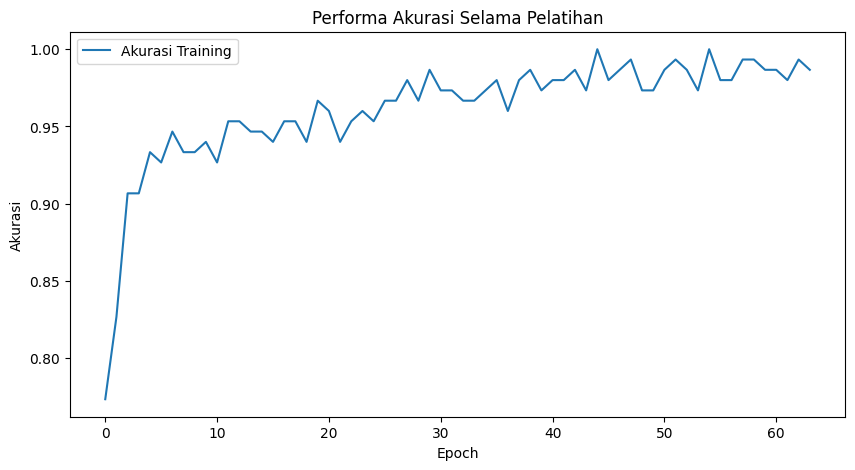

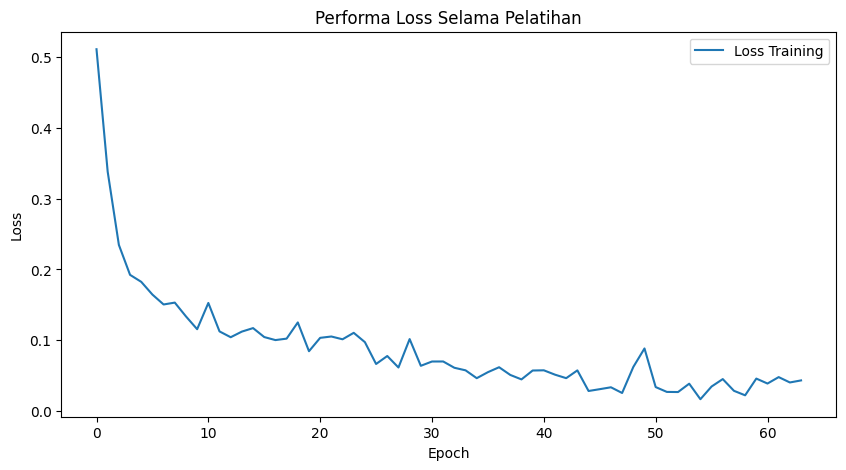

Akurasi pada data uji: 90.00%


In [728]:
history = model.fit(X_train, y_train, epochs=64, batch_size=4, verbose=1, callbacks=[early_stopping])
plot_training_history(history)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi pada data uji: {accuracy * 100:.2f}%")